# Actividad 02: Librerias y modelamiento básico

### Profesor: Juan Marcos Marín Ramírez
#### Métodos Computacionales 2024-2
---
1. Una persona conduce una moto con rapidez constante $v_m$, mientras que un policia lo hace con aceleración constante $a_p$ (iniciando desde el reposo). Suponga que ambos movimientos inician en $t=0$, haga una gráfica para el movimiento de la moto y del policia, donde el usuario ingrese la velocidad (moto) y aceleración (policia). Además determine el instante $t$ en el cual se encuentran ambos. Ambos movimientos iniciarán en $x_i = 0$

**Pruebe**: para $v_m$ = 15m/s y $a_p$ = 3 m/s², el tiempo deberia ser 10 s


$$x_f = x_i + v_m\cdot t$$
$$x_f = x_i + v_o\cdot t + \frac{1}{2}a_p\cdot t^2$$
---

2. El potencial Lennard-Jones es un modelo simple que aproxima la interacción entre un par de moléculas neutras. Este está definido como:

$$
V(r) = 4\epsilon \left[ \left( \frac{\sigma}{r} \right)^{12} - \left( \frac{\sigma}{r} \right)^{6} \right]
$$

Donde:
- $ V(r) $ es el potencial en función de la distancia interatómica $ r $.
- $ \epsilon $ es la profundidad del pozo de potencial, es decir, la energía mínima que describe la interacción entre dos partículas.
- $ \sigma $ es la distancia a la cual el potencial es cero, también conocido como el parámetro de distancia.
- $ r $ es la distancia entre las dos partículas.

a. Escriba una función para encontrar modelar el potencial LJ.


b. Usando $\sigma = \epsilon = 1$ demuestre que la distancia de equilibrio $r_m$ es aproximadamente $r_m = 2^{1/16}\sigma$. Para esto realice un gráfico del potencial, especificando los ejes. Trunque la serie en $r_c = 2.5\sigma$.


c. Verifique que $r_m = 2^{1/16}\sigma$ se cumple para diferentes valores de $\sigma$, dejando $\epsilon$ constante.


---
3.  El siguiente código exporta tablas html de sitios web

```python
import pandas as pd

# Dataset 1
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-height-by-country"

# Read the HTML content
html_content = pd.read_html(url)

alturas = html_content[2]

# Dataset 2
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-net-worth-by-country"

# Read the HTML content
html_content = pd.read_html(url)

income = html_content[0]
````

El primer dataset muestra las alturas medias de niñ@s de 5, 10, 15 y 19 años.

a. Limpie los datos, eliminando columnas en *(in)* y cambie todos los nombres al español.


b. Realice un gráfico de barras, donde se muestre una comparación de la estatura media para niños y niñas en ambas categorias. Esto para los primeros 10 paises con mayor y menor altura, además agregue a Colombia.

c. ¿Existirá una relación entre la riqueza y la altura? Usando el dataset `income`, haga un merge con el dataset `alturas`. Ahora, empleando los datos de altura para los 10 mayores (19 años) y 10 menores (19 años). Realice un gráfico donde relacione la altura media con el GDP y concluya si existe alguna relación.



In [ ]:
#Celda dedicada a importar dependencias.
!pip install translate

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from translate import Translator

Por favor inserte la velocidad: 13
Por favor inserte la aceleracion del policia: 6


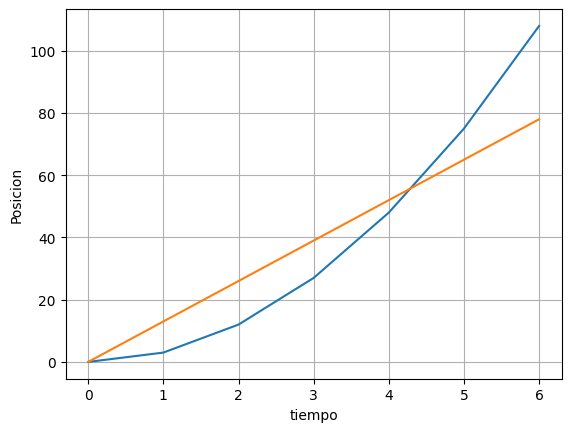

In [ ]:
#SOLUCIÓN PUNTO #1

#Inicializo y leo variables
v = float(input('Por favor inserte la velocidad: '))
a = float(input('Por favor inserte la aceleracion del policia: '))

#Opero las variables para encontrar el tiempo en el que se encuentran el policia
#y la persona, para luego asignarlo a una variable
tf = 2*v/a

#Genero las listas en las que irán los datos de las posiciones de el poli y
#la persona
per = list()
pol = list()

#Genero una lista que alamece los valores del tiempo transcurrido hasta que
#se encuentran. (y la mitad de ese tiempo tambien para estetica de la gráfica)
ltf = np.arange(0,(tf + tf/2),1)

#Asigno a las listas los valores operados entre el tiempo y su posición
per= v*ltf
pol=(1/2)*a*ltf*ltf

#Inicializo gráfica
plt.plot(ltf,pol)
plt.plot(ltf,per)
plt.ylabel("Posicion")
plt.xlabel("tiempo")
plt.grid()
plt.show()


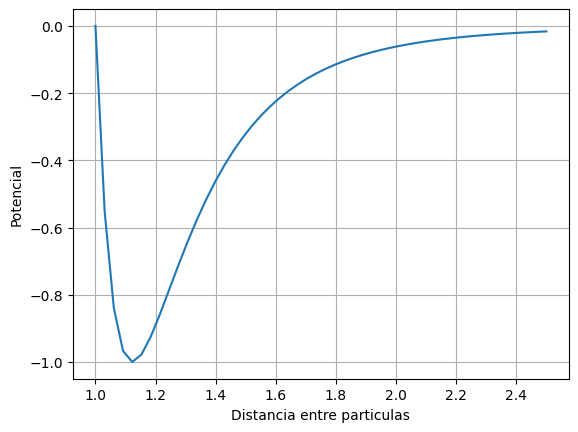

-0.9999999951195426
-1.0
-0.9999999951195426
-1.0


In [ ]:
#SOLUCIÓN PUNTO #2

#Asigno los valores según el enunciado a las variables correspondientes
e = 1
sigm = 1

#Defino la funcion potencial Lennard-Jones como LJ
def LJ(r):
  #Le doy a la variable V la operacióno designada y la retorno
  v = 4*e*(((sigm/r)**12)-((sigm/r)**6))
  return v

#Lleno un arreglo con los valores del dominio de la función
r = np.linspace(sigm,2.5*sigm)

#Imprimo la gráfica
plt.plot(r,LJ(r))
plt.xlabel("Distancia entre particulas")
plt.ylabel("Potencial")
plt.grid()
plt.show()

#Para demostrar que 2**1/6 * sigm es aproximadamente la distancia de equilibrio
#de la función potencial, se imprime el valor minimmo de la función y el valor
#de la función evaluada en 2**1/6 * sigm
print(np.min(LJ(r)))

print(LJ((2**(1/6))*sigm))

#Lego se demestra que esto se cumple para todo valor de sigma asignandole un
#valor aleatorio y haciendo exactamente el paso anterior
sigm = random.uniform(1,2000)
r = np.linspace(sigm,2.5*sigm)

print(np.min(LJ(r)))

print(LJ((2**(1/6))*sigm))

#-0.9999... es aproximadamente -0.1


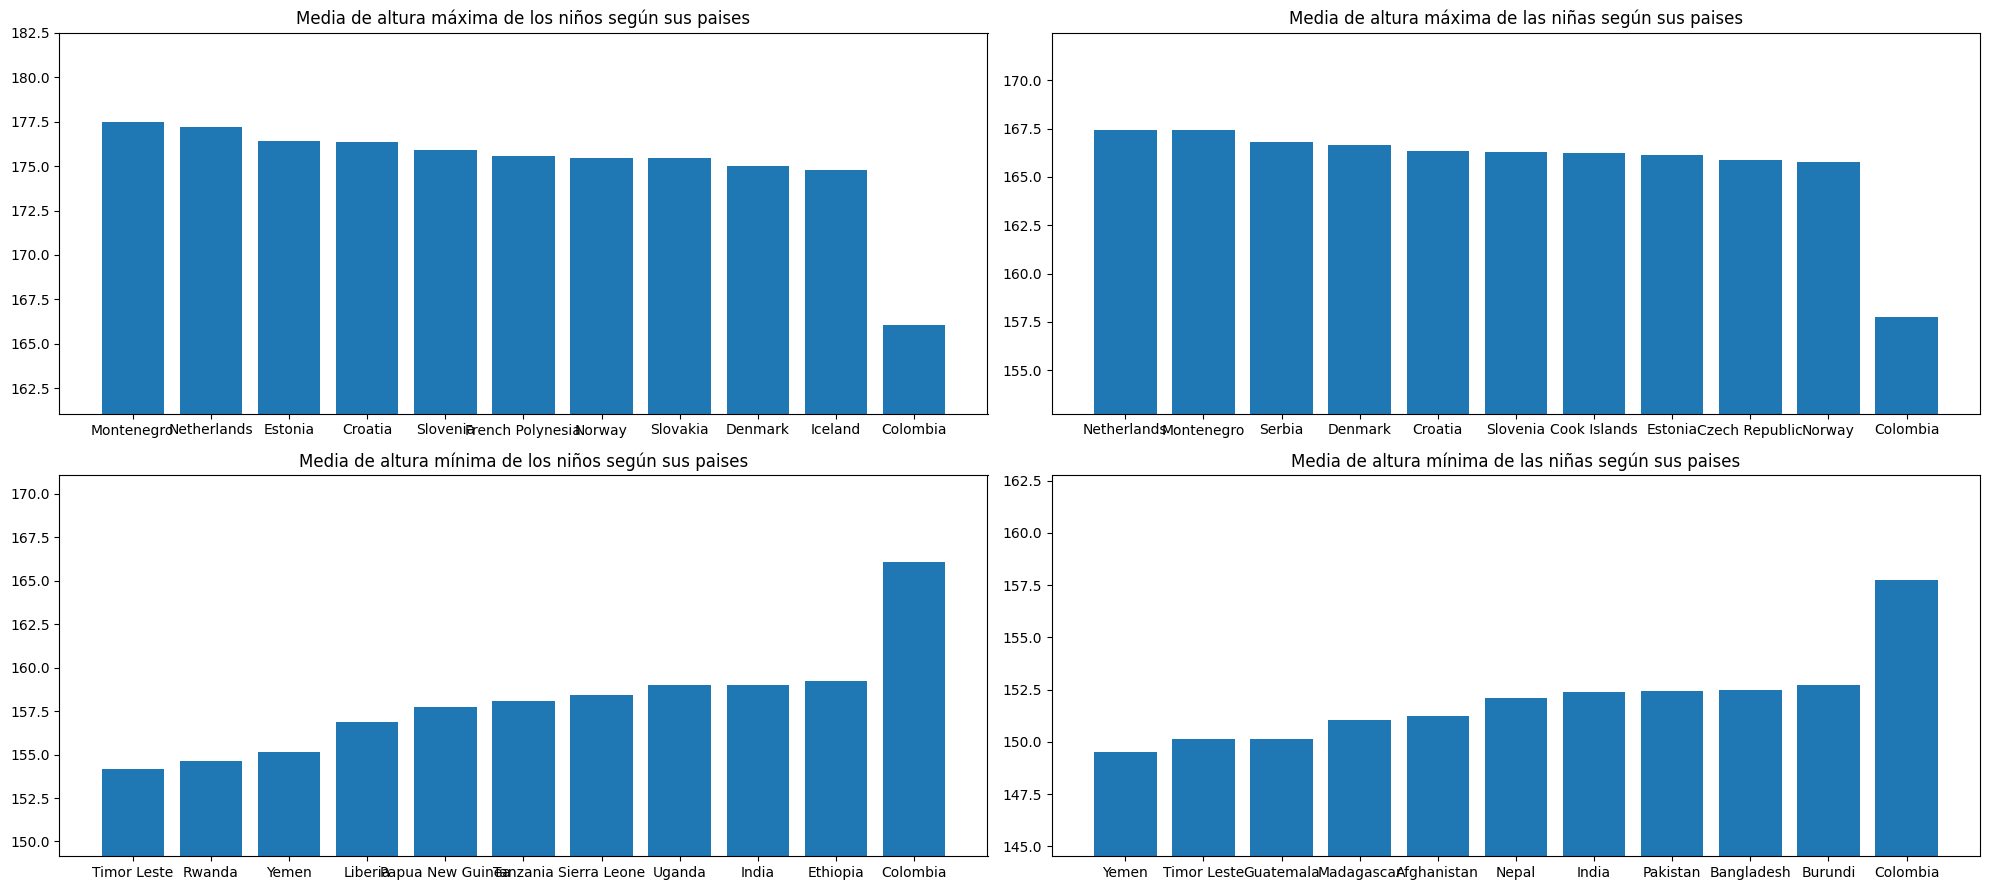

In [63]:
#SOLUCIÓN PUNTO #3

# Dataset 1
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-height-by-country"

# Read the HTML content
html_content = pd.read_html(url)

alturas = html_content[2]

#A una nueva variable le asigno el nuevo dataframe con las filas con (in) removidas
new_alt = alturas.drop(["Boys 19 (in)", "Girls 19 (in)"], axis=1)

#Tradusco los títulos con translate
translator = Translator(to_lang="es")
tr=[]
for i in alturas.columns:
  tr.append(translator.translate(i))

for i in range(len(tr)):
  alturas.rename(columns={alturas.columns[i]: tr[i]}, inplace=True)

#Extraigo las filas

maxmale = alturas['Niños 15 (cm)'].sort_values(ascending=False).iloc[0:10]
maxfem = alturas['Niñas 15 (cm)'].sort_values(ascending=False).iloc[0:10]
minmale = alturas['Niños 15 (cm)'].sort_values(ascending=True).iloc[0:10]
minfem = alturas['Niñas 15 (cm)'].sort_values(ascending=True).iloc[0:10]

#Añado a Colombia
maxmale = pd.concat([maxmale,alturas['Niños 15 (cm)'][alturas['País'] == 'Colombia']])
maxfem = pd.concat([maxfem,alturas['Niñas 15 (cm)'][alturas['País'] == 'Colombia']])
minmale = pd.concat([minmale,alturas['Niños 15 (cm)'][alturas['País'] == 'Colombia']])
minfem = pd.concat([minfem,alturas['Niñas 15 (cm)'][alturas['País'] == 'Colombia']])

#Creo el gráfico de barras
fig, axs = plt.subplots(2,2)

#Amplio un poco el gráfico
fig.set_figheight(9)
fig.set_figwidth(20)

axs[0,0].bar(alturas['País'][maxmale.index],maxmale)
axs[0,0].set_title("Media de altura máxima de los niños según sus paises")
axs[0,0].set(ylim=[min(maxmale)-5, max(maxmale)+5])

axs[0,1].bar(alturas['País'][maxfem.index],maxfem)
axs[0,1].set_title("Media de altura máxima de las niñas según sus paises")
axs[0,1].set(ylim=[min(maxfem)-5, max(maxfem)+5])

axs[1,0].bar(alturas['País'][minmale.index],minmale)
axs[1,0].set_title("Media de altura mínima de los niños según sus paises")
axs[1,0].set(ylim=[min(minmale)-5, max(minmale)+5])

axs[1,1].bar(alturas['País'][minfem.index],minfem)
axs[1,1].set_title("Media de altura mínima de las niñas según sus paises")
axs[1,1].set(ylim=[min(minfem)-5, max(minfem)+5])


plt.tight_layout()
plt.show()

[(145.91, 159.39)]

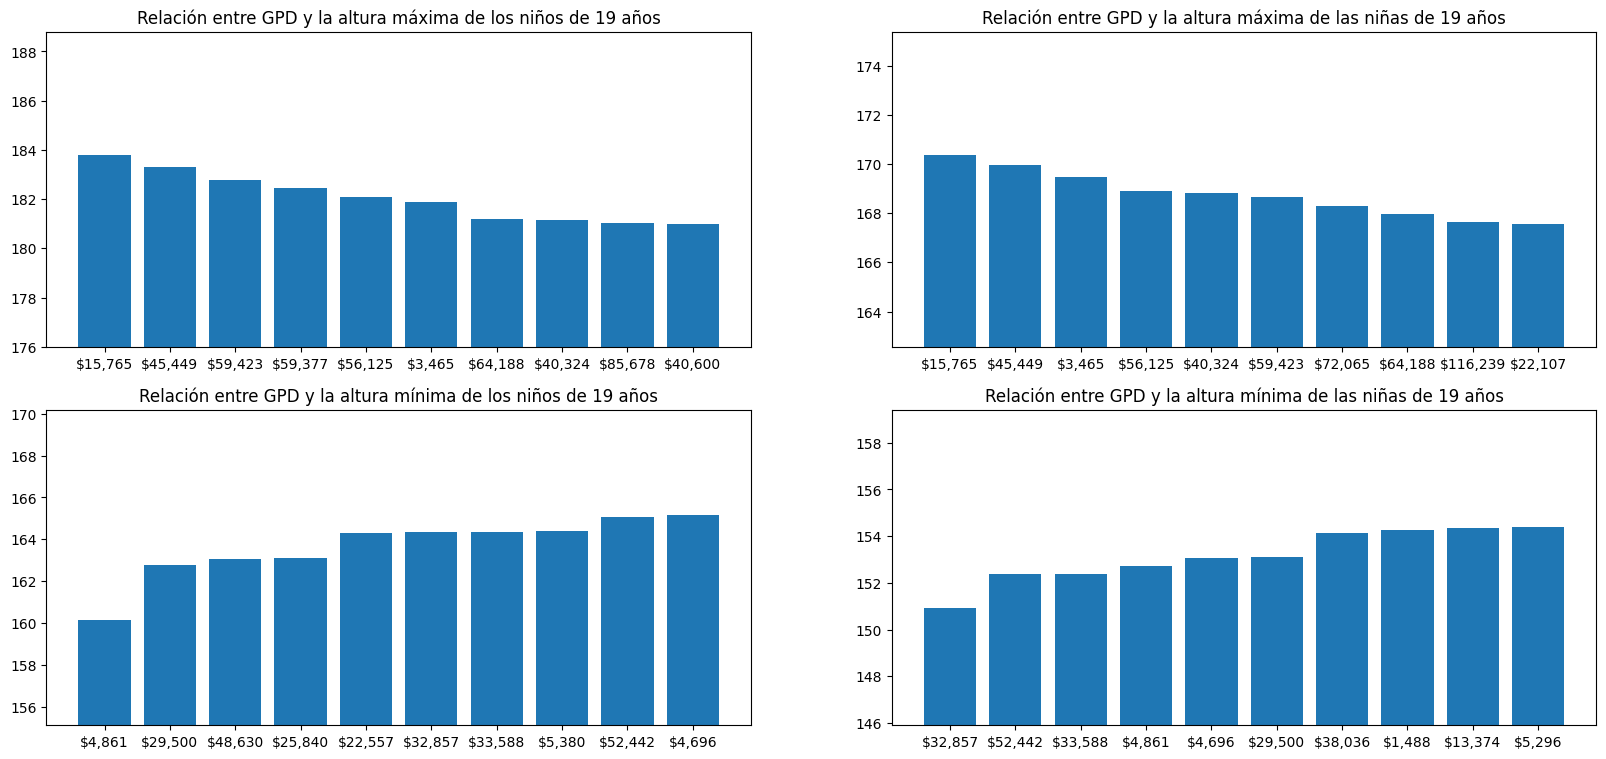

In [64]:
# Dataset 2
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-net-worth-by-country"

# Read the HTML content
html_content = pd.read_html(url)

income = html_content[0]

#Tradusco los titulos de el nuevo dataset
tr=[]
for i in income.columns:
  tr.append(translator.translate(i))

for i in range(len(tr)):
  income.rename(columns={income.columns[i]: tr[i]}, inplace=True)

#Hago un merge entre ambos datasets
new_ds = pd.merge(income,alturas,on="País")


new_maxmale = alturas['Altura media, niños, 19 años (cm)'].sort_values(ascending=False).iloc[0:10]
new_maxfem = alturas['Niñas 19 (cm)'].sort_values(ascending=False).iloc[0:10]
new_minmale = alturas['Altura media, niños, 19 años (cm)'].sort_values(ascending=True).iloc[0:10]
new_minfem = alturas['Niñas 19 (cm)'].sort_values(ascending=True).iloc[0:10]


#Creo el gráfico de barras
fig, axs = plt.subplots(2,2)

#Amplio un poco el gráfico
fig.set_figheight(9)
fig.set_figwidth(20)

axs[0,0].bar(new_ds['PIB por adulto (USD)'][new_maxmale.index],new_maxmale,label=new_ds['País'][new_maxmale.index])
axs[0,0].set_title("Relación entre GPD y la altura máxima de los niños de 19 años")
axs[0,0].set(ylim=[min(new_maxmale)-5, max(new_maxmale)+5])

axs[0,1].bar(new_ds['PIB por adulto (USD)'][new_maxfem.index],new_maxfem,label=new_ds['País'][new_maxfem.index])
axs[0,1].set_title("Relación entre GPD y la altura máxima de las niñas de 19 años")
axs[0,1].set(ylim=[min(new_maxfem)-5, max(new_maxfem)+5])

axs[1,0].bar(income['PIB por adulto (USD)'][new_minmale.index],new_minmale)
axs[1,0].set_title("Relación entre GPD y la altura mínima de los niños de 19 años")
axs[1,0].set(ylim=[min(new_minmale)-5, max(new_minmale)+5])

axs[1,1].bar(income['PIB por adulto (USD)'][new_minfem.index],new_minfem)
axs[1,1].set_title("Relación entre GPD y la altura mínima de las niñas de 19 años")
axs[1,1].set(ylim=[min(new_minfem)-5, max(new_minfem)+5])

Hay contadas exsepciones pero se podría llegar a una conclusión poco fiable (según los resultados obtenidos en este laboratorio) que a medida que aumenta el producto interno bruto por adulto de un país, aumenta la estatura máxima de los niños de 19 años. Sin embargo, nada se puede concluir con respecto a la altura mínima.